<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/redesneuronalesIntro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [6]:
#celsius=np.array([-40.,-10,0,8,15,22,38,10,20,30,40])
#fahrenheit=np.array([-40,14,32,46,59,72,100,50,68,86,104])

kelvin=np.array([1, 10,90,20,35,81,40,12.5])
rankine=np.array([1.8,18,162,36,63,145.8,72,22.5])

In [3]:
capa=tf.keras.layers.Dense(units=1,input_shape=[1]) #una entrada con una neurona
modelo=tf.keras.Sequential([capa]) #modelo secuencial

In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), #como ajustar los pesos y el sesgo
    loss='mean_squared_error' #funcion de perdida
)

In [5]:
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
print('inciando entrenamiento...')
#historial=modelo.fit(celsius,fahrenheit,epochs=1000,verbose=False)
historial=modelo.fit(kelvin,rankine,epochs=1000,verbose=False)
print('entrenamiento finalizado! ')

inciando entrenamiento...
entrenamiento finalizado! 


In [ ]:
# Guarde el modelo entrenado como archivo hdf5
# Guarde el diagrama del modelo y los pesos al mismo tiempo.
modelo.save('modelo_entrenado.h5')  

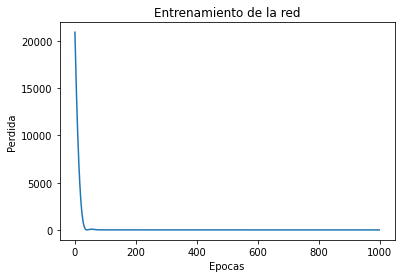

In [8]:
import matplotlib.pyplot as plt

plt.plot(historial.history['loss'])
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.title('Entrenamiento de la red')
plt.show()

In [9]:
print('Haciendo la prediccion')
resultado=modelo.predict([100,200])
print(resultado) #valor correcto 212,392 #valor correcto 180,360

Haciendo la prediccion
[[179.89865]
 [359.63232]]


In [10]:
print('variables internas del modelo')
print(capa.get_weights()) #muestra los pesos y el sesgo

variables internas del modelo
[array([[1.7973367]], dtype=float32), array([0.16498539], dtype=float32)]


In [11]:
print('Haciendo la prediccion')
resultado=modelo.predict([100,200])
print(resultado) #valor correcto 212,392

Haciendo la prediccion
[[179.89865]
 [359.63232]]


In [ ]:
from keras.models import load_model
  
# Recargar el modelo
modelo2 = load_model('modelo_entrenado.h5')

In [ ]:
print('Haciendo la prediccion')
resultado=modelo2.predict([100,200])
print(resultado) #valor correcto 212,392

Haciendo la prediccion
[[212.12158]
 [392.51337]]


In [ ]:
oculta1=tf.keras.layers.Dense(units=3,input_shape=[1])
oculta2=tf.keras.layers.Dense(units=3)
salida=tf.keras.layers.Dense(units=1)
modelo=tf.keras.Sequential([oculta1,oculta2,salida])

In [ ]:
print('variables internas del modelo')
print(oculta1.get_weights()) #muestra los pesos y el sesgo
print(oculta2.get_weights()) #muestra los pesos y el sesgo
print(salida.get_weights()) #muestra los pesos y el sesgo

variables internas del modelo
[array([[ 0.51472235, -0.62056124,  0.21176958]], dtype=float32), array([ 3.6830595, -3.692125 , -3.6924775], dtype=float32)]
[array([[-0.52738583, -0.9705716 ,  0.7376793 ],
       [-0.77733517,  0.9197766 , -0.90468776],
       [-0.4664541 ,  1.2039813 , -0.22070648]], dtype=float32), array([ 3.2871253, -3.7499506,  3.678018 ], dtype=float32)]
[array([[ 0.28206336],
       [-1.0549899 ],
       [ 1.0143915 ]], dtype=float32), array([3.597682], dtype=float32)]
